In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle/

In [4]:
#copy the kaggle.json to folder created
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/ .kaggle/kaggle.json

chmod: cannot access '.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 95% 407M/428M [00:05<00:00, 94.8MB/s]
100% 428M/428M [00:05<00:00, 86.0MB/s]


In [7]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [9]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
         break

print('Dataset is Loaded')

Dataset is Loaded


In [10]:
len(paths)

2800

In [11]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_note_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_reach_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_judge_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_death_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_king_sad.wav']

In [12]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [13]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [14]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
disgust,400
ps,400
happy,400
neutral,400
fear,400


In [15]:
df['label_count']= df["label"].value_counts()

In [16]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

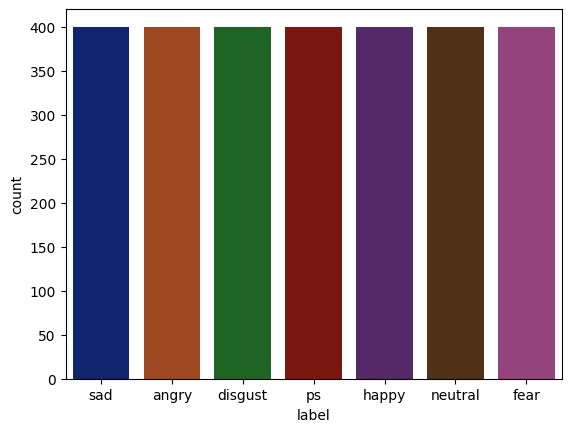

In [18]:
sns.countplot(x = df['label'], data=df, palette='dark')

In [19]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,sad,NaN
1,/content/tess toronto emotional speech set dat...,sad,NaN
2,/content/tess toronto emotional speech set dat...,sad,NaN
3,/content/tess toronto emotional speech set dat...,sad,NaN
4,/content/tess toronto emotional speech set dat...,sad,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,ps,NaN
2796,/content/tess toronto emotional speech set dat...,ps,NaN
2797,/content/tess toronto emotional speech set dat...,ps,NaN
2798,/content/tess toronto emotional speech set dat...,ps,NaN


In [20]:
df.drop('label_count', axis=1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [22]:
df

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


In [23]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(np.abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [24]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'angry' 'disgust' 'ps' 'happy' 'neutral' 'fear']


In [25]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_note_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_reach_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_judge_sad.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_make_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_name_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_rose_ps.wav'],
      dtype=object)

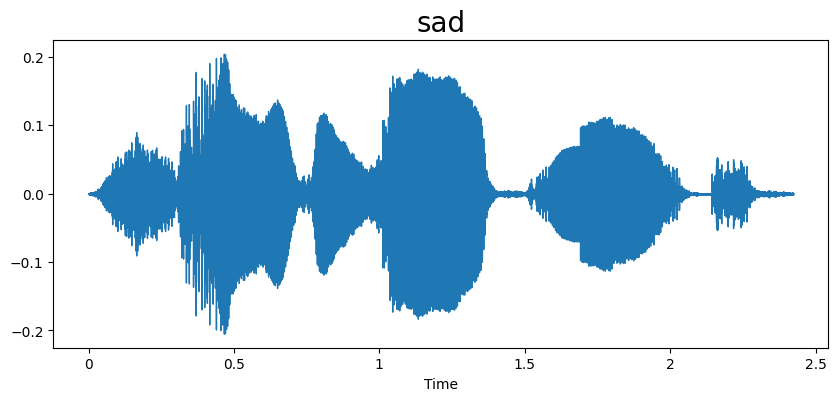

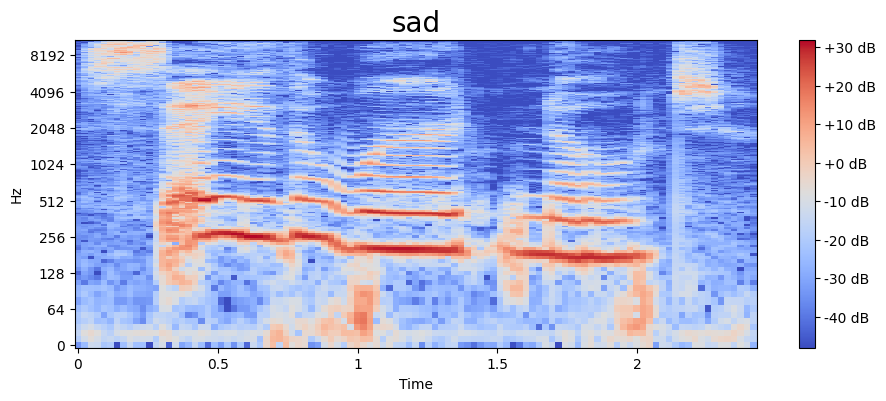

In [26]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


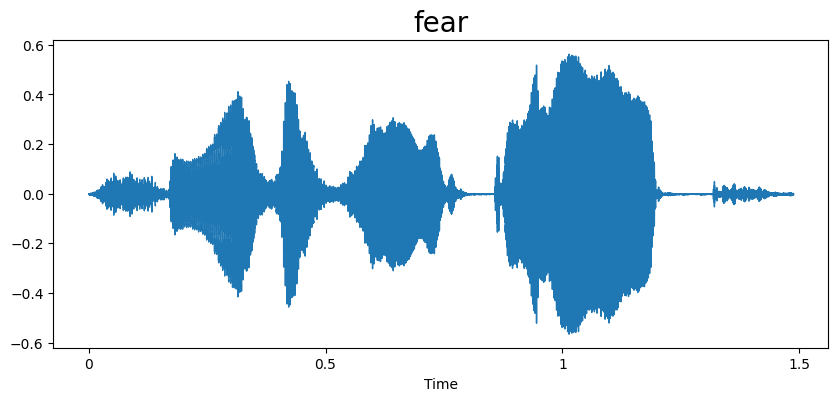

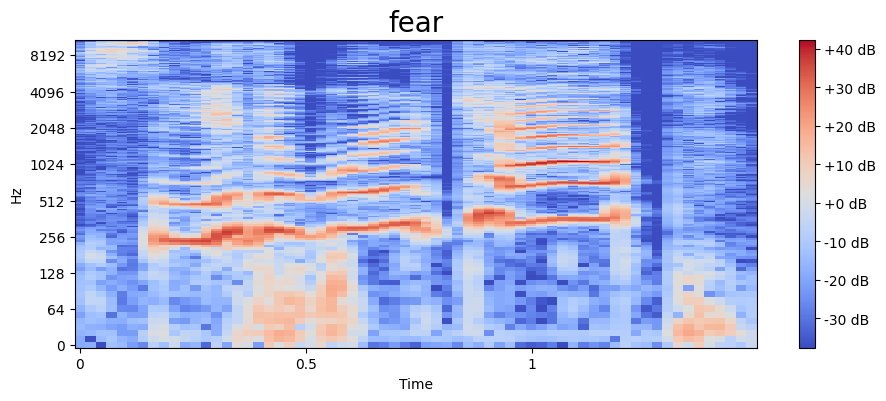

In [27]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

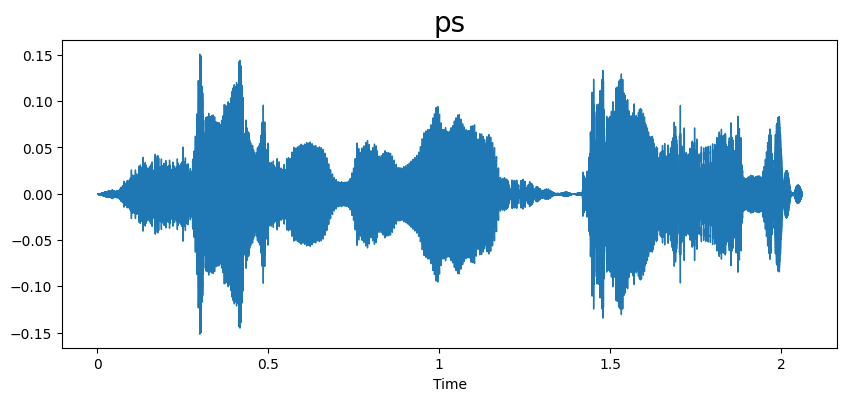

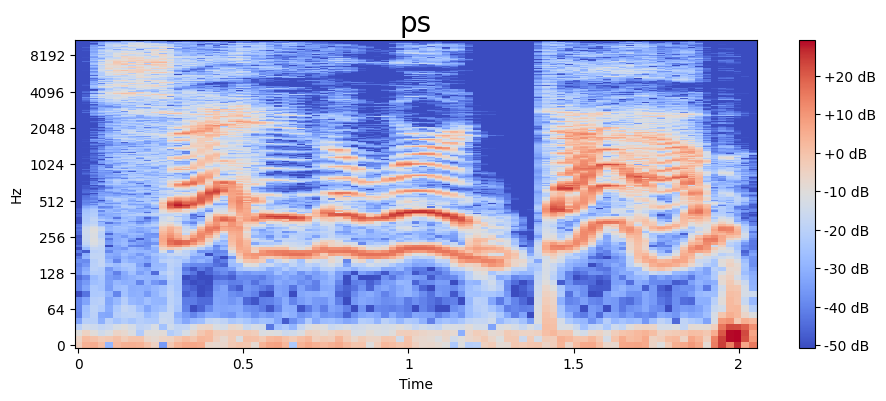

In [28]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

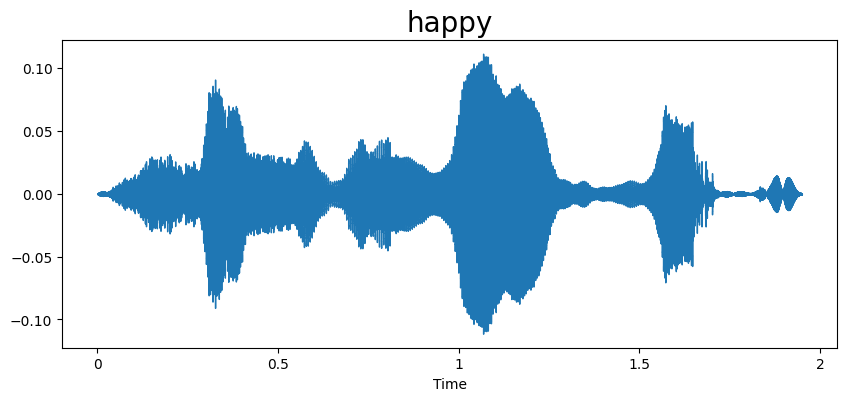

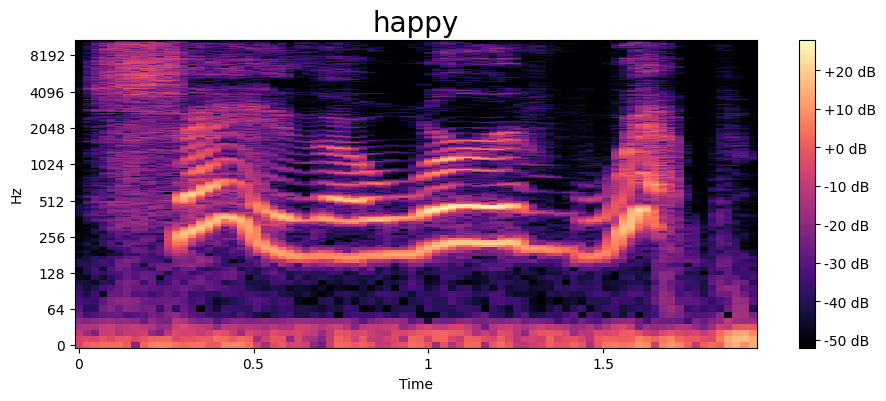

In [29]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


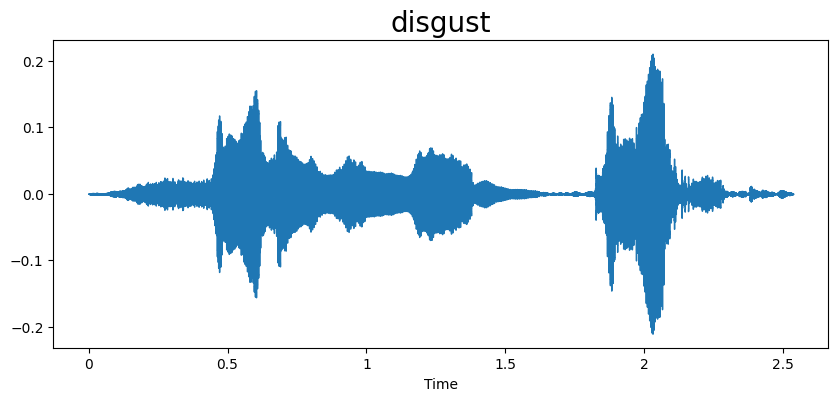

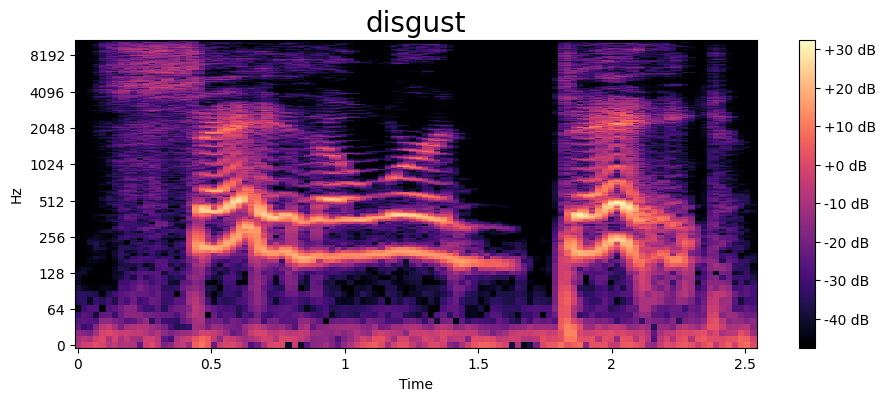

In [30]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


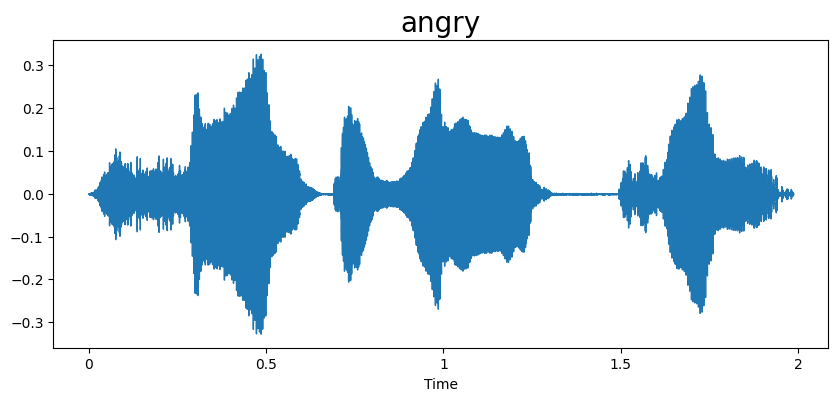

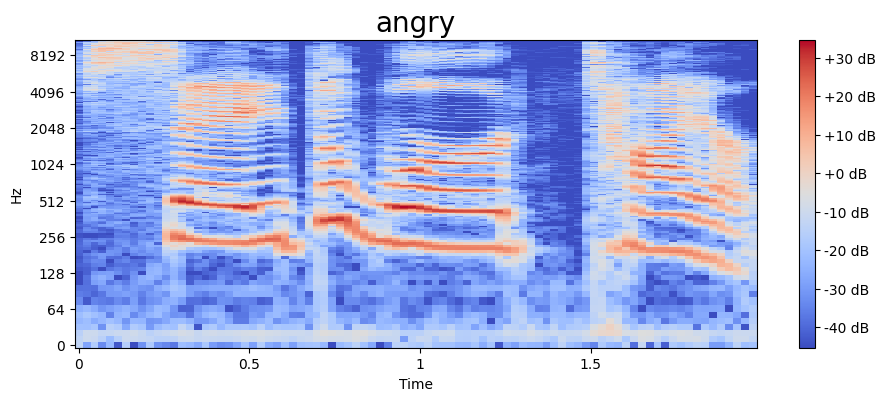

In [31]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


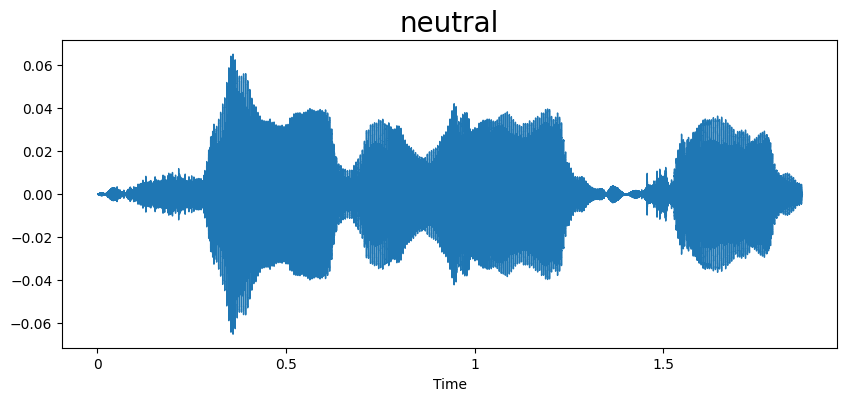

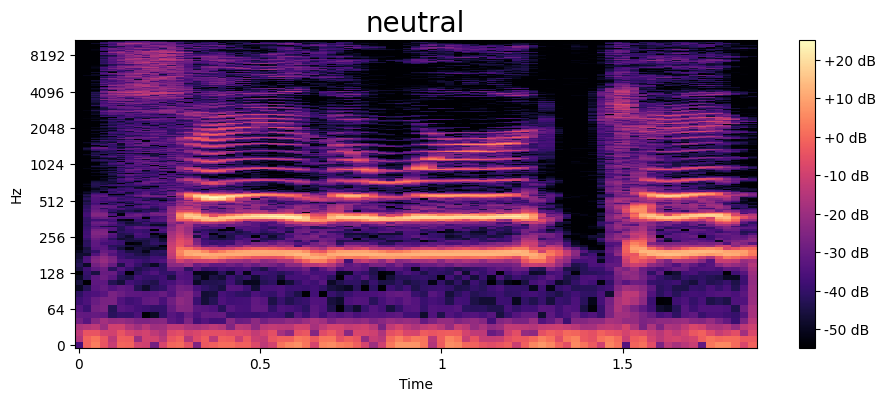

In [32]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


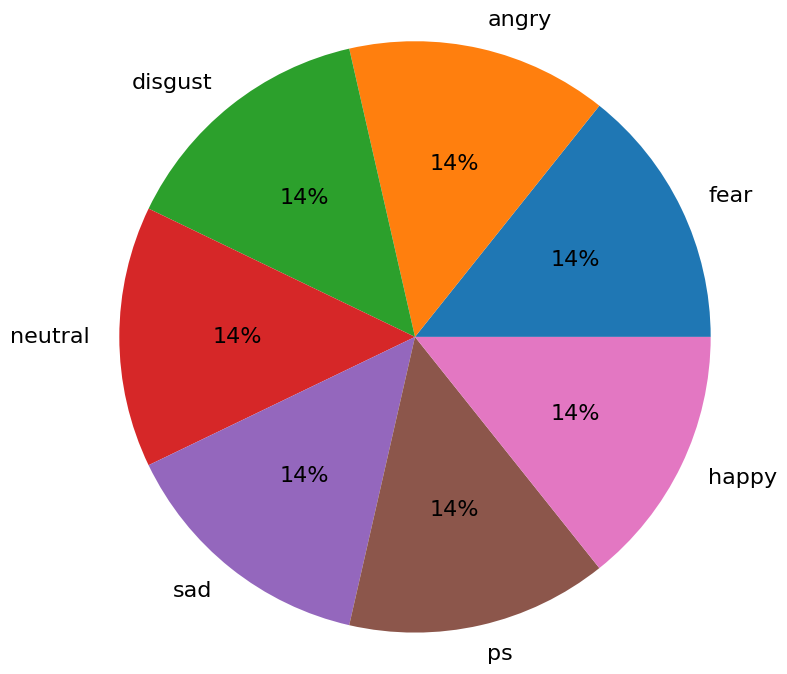

In [33]:
labels = ["fear", "angry", "disgust", "neutral", "sad","ps", "happy"]
plt.pie(df['label'].value_counts(), labels = labels, autopct = '%.0f%%', radius= 2, textprops={'fontsize': 16})
plt.show()

In [34]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

In [35]:
feature_extract_mfcc(df['speech'][0])

array([-4.2105624e+02,  8.8140869e+01,  2.8760416e+01,  3.2084972e+01,
        8.6070317e-01,  1.3905377e+01,  2.1214118e+00, -1.9635763e+01,
       -2.3089790e-01, -6.6749244e+00, -8.1786222e+00,  1.9645262e-01,
       -6.9287419e+00,  7.5420494e+00, -1.0567638e+01, -5.8266240e-01,
        8.5380149e-01, -2.0815651e+00, -8.7491846e+00, -4.4250512e+00,
       -6.1515670e+00, -8.9947281e+00, -7.6742067e+00,  3.0523959e-01,
       -3.7308879e+00,  6.2762794e+00,  4.0664611e+00,  1.1229211e+00,
        3.2907844e-01, -4.5660013e-01, -5.7122231e+00,  8.2452154e+00,
        7.1073294e+00,  1.1062939e+01,  8.0777502e+00,  6.8696899e+00,
        3.6059406e+00,  4.2841139e+00,  5.6396604e+00,  8.2786703e+00],
      dtype=float32)

In [36]:
MFCC = df['speech'].apply(lambda x: feature_extract_mfcc(x))
MFCC

,speech
0,"[-421.05624, 88.14087, 28.760416, 32.084972, 0..."
1,"[-388.30322, 81.76997, 34.014782, 48.110905, 0..."
2,"[-406.11194, 63.60104, 19.19331, 41.224453, -3..."
3,"[-396.78217, 81.28543, 18.941088, 28.715048, -..."
4,"[-401.18402, 75.4512, 26.104256, 46.837254, -3..."
...,...
2795,"[-360.60538, 18.66925, 5.2834063, 8.466813, -1..."
2796,"[-350.654, 47.585686, 2.8217607, 16.232906, -1..."
2797,"[-396.85333, 75.98728, -9.192946, 25.25311, -1..."
2798,"[-375.57904, 82.77961, -5.4110694, 26.476393, ..."


In [37]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

In [38]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y= y.toarray()

In [40]:
y.shape

(2800, 7)

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state =42)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train,y_train, validation_data=(X, y), epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.2353 - loss: 1.8765 - val_accuracy: 0.6396 - val_loss: 1.1110
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.5230 - loss: 1.2024 - val_accuracy: 0.8075 - val_loss: 0.6011
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.6809 - loss: 0.8187 - val_accuracy: 0.8575 - val_loss: 0.3598
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.7906 - loss: 0.5789 - val_accuracy: 0.9079 - val_loss: 0.2752
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 309ms/step - accuracy: 0.8625 - loss: 0.4031 - val_accuracy: 0.9200 - val_loss: 0.2536
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 357ms/step - accuracy: 0.8841 - loss: 0.3716 - val_accuracy: 0.9582 - val_loss: 0.1326
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.9173 - loss: 0.2996 - val_accuracy: 0.9500 - val_loss: 0.1726
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.9228 - loss: 0.2523 - val_accur

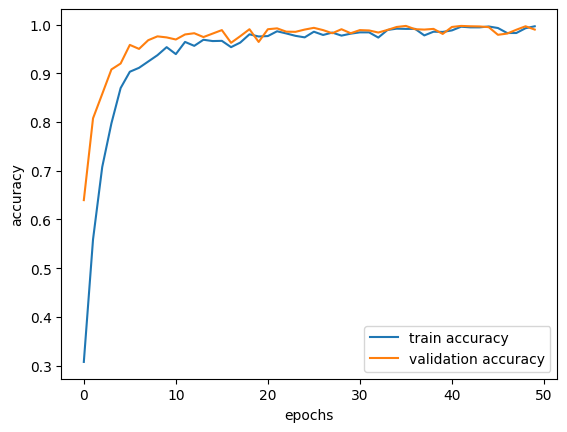

In [47]:
epochs = list(range(50))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

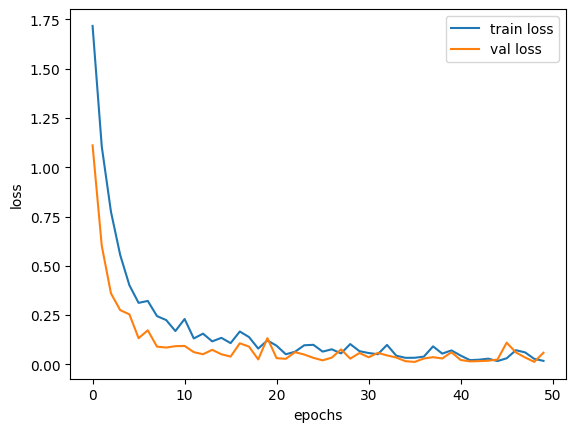

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(X_train , y_train)

70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9925 - loss: 0.0361


[0.04627758637070656, 0.9910714030265808]

In [50]:
accuracy_score=model.evaluate(X_test , y_test)
print ("Model evaluation accuracy: ", round(accuracy_score[1]*100),"%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9862 - loss: 0.0802
Model evaluation accuracy:  98 %


In [51]:
y_pred = model.predict(X)

88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


In [52]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [53]:
y_val_classes = np.argmax(y, axis=1)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Confusion Matrix:
[[386   2  11   0   0   1   0]
 [  0 399   0   0   0   1   0]
 [  0   0 399   1   0   0   0]
 [  0   1   0 399   0   0   0]
 [  0   0   0   0 400   0   0]
 [  0  12   0   0   0 388   0]
 [  0   0   0   0   0   0 400]]
Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.96      0.98       400
     disgust       0.96      1.00      0.98       400
        fear       0.97      1.00      0.99       400
       happy       1.00      1.00      1.00       400
     neutral       1.00      1.00      1.00       400
          ps       0.99      0.97      0.98       400
         sad       1.00      1.00      1.00       400

    accuracy                           0.99      2800
   macro avg       0.99      0.99      0.99      2800
weighted avg       0.99      0.99      0.99      2800



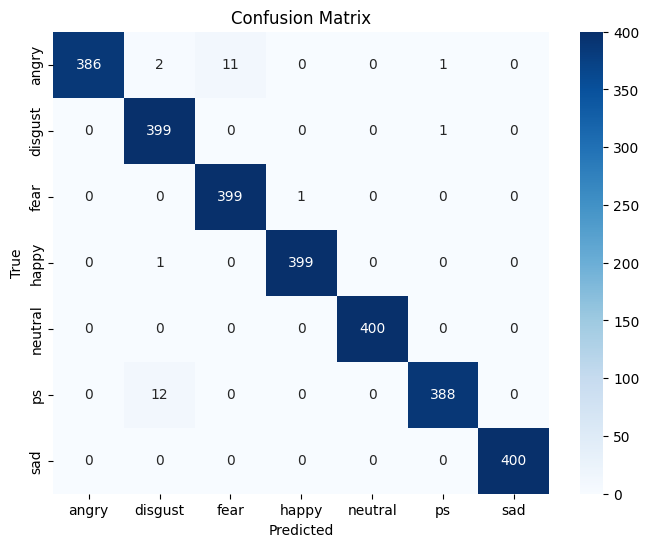

In [55]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()